In [2]:
import pandas as pd
df=pd.read_excel("C:/Users/preet/Downloads/ppm data.xlsx")

In [3]:
df

,Material,Supplier,MvT,Quantity,Pstng Date,Region,Team
0,A1,S1,1,1000,January,South,alpha
1,A2,S2,1,1050,February,South,alpha
2,A3,S3,1,1100,March,North,alpha
3,A4,S4,1,1150,April,North,alpha
4,A5,S5,1,1200,May,North,beta
...,...,...,...,...,...,...,...
1315,A16,S6,5,14,April,West,beta
1316,A17,S7,5,15,May,West,beta
1317,A18,S8,5,16,June,East,gamma
1318,A19,S9,5,17,July,East,gamma


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Material    1320 non-null   object
 1   Supplier    1320 non-null   object
 2   MvT         1320 non-null   int64 
 3   Quantity    1320 non-null   int64 
 4   Pstng Date  1320 non-null   object
 5   Region      1320 non-null   object
 6   Team        1320 non-null   object
dtypes: int64(2), object(5)
memory usage: 72.3+ KB


In [5]:
mat_ppm = df.pivot_table(index='Material', columns='MvT', values='Quantity',aggfunc='sum',fill_value=0).reset_index()
mat_ppm['Receipt'] = mat_ppm[1] - mat_ppm[2]
mat_ppm['Rejection'] = mat_ppm[3] - mat_ppm[4]
mat_ppm['Scrap'] = mat_ppm[5]
mat_ppm['PPM'] = ((mat_ppm['Rejection'] + mat_ppm['Scrap']) / mat_ppm['Receipt'])*1000000
mat_ppm = mat_ppm.sort_values(by='PPM', ascending=False)
mat_ppm

MvT,Material,1,2,3,4,5,Receipt,Rejection,Scrap,PPM
6,A15,211800,-4798,1020,-575,65,216598,1595,65,7663.967350
5,A14,210140,-4198,970,-545,61,214338,1515,61,7352.872566
4,A13,208480,-3598,920,-515,57,212078,1435,57,7035.147446
3,A12,206820,-2998,870,-485,53,209818,1355,53,6710.577739
2,A11,204985,-2499,820,-455,81,207484,1275,81,6535.443697
17,A7,233440,-10298,655,-635,83,243738,1290,83,5633.097835
16,A6,231630,-9798,635,-600,79,241428,1235,79,5442.616432
15,A5,229820,-9298,615,-565,75,239118,1180,75,5248.454738
11,A2,224665,-7798,555,-595,63,232463,1150,63,5218.034698
0,A1,222965,-7298,535,-560,71,230263,1095,71,5063.774901


In [17]:
supp_ppm = df.pivot_table(index='Supplier', columns='MvT', values='Quantity', aggfunc='sum', fill_value=0).reset_index()
supp_ppm['Receipt'] = supp_ppm[1] - supp_ppm[2]
supp_ppm['Rejection'] = supp_ppm[3] - supp_ppm[4]
supp_ppm['Scrap'] = supp_ppm[5]
supp_ppm['PPM'] = ((supp_ppm['Rejection'] + supp_ppm['Scrap']) / supp_ppm['Receipt'])*1000000
supp_ppm = supp_ppm.sort_values(by='PPM', ascending=False)
supp_ppm

MvT,Supplier,1,2,3,4,5,Receipt,Rejection,Scrap,PPM
5,S5,441620,-14096,1635,-1140,140,455716,2775,140,6396.527662
4,S4,438205,-12996,1565,-1075,132,451201,2640,132,6143.603405
2,S2,431485,-10796,1425,-1080,116,442281,2505,116,5926.096757
3,S3,434845,-11896,1495,-1010,124,446741,2505,124,5884.841552
0,S1,427950,-9797,1355,-1015,152,437747,2370,152,5761.318753
9,S9,455770,-18496,850,-1295,172,474266,2145,172,4885.444034
7,S7,448560,-16296,955,-1135,156,464856,2090,156,4831.603765
6,S6,445090,-15196,945,-1130,148,460286,2075,148,4829.605941
1,S10,459240,-19596,870,-1240,171,478836,2110,171,4763.635149
8,S8,452165,-17396,780,-1215,164,469561,1995,164,4597.911666


In [7]:
team_ppm = df.pivot_table(index='Team', columns='MvT', values='Quantity', aggfunc='sum', fill_value=0).reset_index()
team_ppm['Receipt'] = team_ppm[1] - team_ppm[2]
team_ppm['Rejection'] = team_ppm[3] - team_ppm[4]
team_ppm['Scrap'] = team_ppm[5]
team_ppm['PPM'] = ((team_ppm['Rejection'] + team_ppm['Scrap']) / supp_ppm['Receipt'])*1000000
team_ppm = team_ppm.sort_values(by='PPM', ascending=False)
team_ppm

MvT,Team,1,2,3,4,5,Receipt,Rejection,Scrap,PPM
0,alpha,1732485,-45485,5840,-4180,524,1777970,10020,524,24086.972612
1,beta,1335270,-45588,3535,-3405,444,1380858,6940,444,15420.728600
2,gamma,1367175,-55488,2500,-3750,507,1422663,6250,507,15277.617623


In [8]:
mat_ppm = df.pivot_table(index='Pstng Date', columns='MvT', values='Quantity',aggfunc='sum',fill_value=0).reset_index()
mat_ppm['Receipt'] = mat_ppm[1] - mat_ppm[2]
mat_ppm['Rejection'] = mat_ppm[3] - mat_ppm[4]
mat_ppm['Scrap'] = mat_ppm[5]
mat_ppm['PPM'] = ((mat_ppm['Rejection'] + mat_ppm['Scrap']) / mat_ppm['Receipt'])*1000000
mat_ppm = mat_ppm.sort_values(by='PPM', ascending=False)
mat_ppm

MvT,Pstng Date,1,2,3,4,5,Receipt,Rejection,Scrap,PPM
7,March,353515,-12296,1205,-1060,113,365811,2265,113,6500.624639
9,November,376775,-9197,1325,-815,136,385972,2140,136,5896.800804
6,June,362005,-14396,950,-1120,121,376401,2070,121,5820.919711
3,February,386405,-11196,1160,-1005,125,397601,2165,125,5759.542858
8,May,359175,-13396,915,-1045,135,372571,1960,135,5623.089290
4,January,383425,-10496,1115,-950,118,393921,2065,118,5541.720294
0,April,356345,-13396,800,-1040,119,369741,1840,119,5298.303407
2,December,379605,-9796,1080,-865,111,389401,1945,111,5279.904263
5,July,365010,-11598,975,-875,128,376608,1850,128,5252.145467
10,October,373810,-14598,920,-765,120,388408,1685,120,4647.175135


In [9]:
supp_ppm = df.pivot_table(index=['Supplier','Pstng Date'], columns='MvT', values='Quantity', aggfunc='sum', fill_value=0).reset_index()
supp_ppm['Receipt'] = supp_ppm[1] - supp_ppm[2]
supp_ppm['Rejection'] = supp_ppm[3] - supp_ppm[4]
supp_ppm['Scrap'] = supp_ppm[5]
supp_ppm['PPM'] = ((supp_ppm['Rejection'] + supp_ppm['Scrap']) / supp_ppm['Receipt'])*1000000
supp_ppm = supp_ppm.sort_values(by='PPM', ascending=False)
supp_ppm

MvT,Supplier,Pstng Date,1,2,3,4,5,Receipt,Rejection,Scrap,PPM
32,S5,March,70420,-2298,580,-320,26,72718,900,26,12734.123601
27,S4,February,69890,-2198,540,-305,24,72088,845,24,12054.710909
18,S3,January,69360,-2098,500,-290,22,71458,790,22,11363.318313
14,S2,December,68830,-1998,460,-275,20,70828,735,20,10659.626137
4,S1,November,68300,-1999,420,-260,50,70299,680,50,10384.215992
43,S7,July,66180,-6800,305,-335,36,72980,640,36,9262.811729
40,S6,June,65650,-6400,300,-320,35,72050,620,35,9090.909091
33,S5,May,65120,-6000,295,-305,34,71120,600,34,8914.510686
24,S4,April,64590,-5600,290,-290,33,70190,580,33,8733.437812
20,S3,March,64060,-5200,285,-275,32,69260,560,32,8547.502166


In [10]:
team_ppm = df.pivot_table(index=['Team','Pstng Date'], columns='MvT', values='Quantity', aggfunc='sum', fill_value=0).reset_index()
team_ppm['Receipt'] = team_ppm[1] - team_ppm[2]
team_ppm['Rejection'] = team_ppm[3] - team_ppm[4]
team_ppm['Scrap'] = team_ppm[5]
team_ppm['PPM'] = ((team_ppm['Rejection'] + team_ppm['Scrap']) / supp_ppm['Receipt'])*1000000
team_ppm = team_ppm.sort_values(by='PPM', ascending=False)
team_ppm

MvT,Team,Pstng Date,1,2,3,4,5,Receipt,Rejection,Scrap,PPM
2,alpha,December,144020,-5196,710,-475,33,149216,1185,33,21258.399511
4,alpha,January,132360,-6498,775,-535,52,138858,1310,52,19374.386549
3,alpha,February,133420,-6998,820,-565,55,140418,1385,55,16673.420946
19,beta,March,147475,-5796,860,-550,42,153271,1410,42,16566.832107
20,beta,May,136600,-8498,475,-520,64,145098,995,64,15290.210800
30,gamma,June,150985,-6396,500,-505,42,157381,1005,42,13240.929268
9,alpha,November,142960,-5097,660,-450,62,148057,1110,62,12721.845319
0,alpha,April,121975,-6400,385,-410,54,128375,795,54,12596.439169
17,beta,July,125035,-8800,415,-485,60,133835,900,60,12446.841614
11,alpha,September,154845,-3198,540,-265,23,158043,805,23,10927.807840


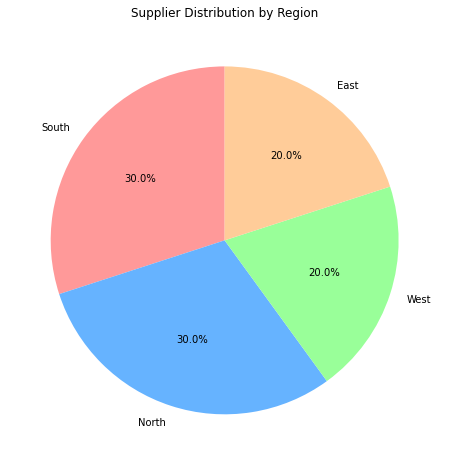

In [12]:
import matplotlib.pyplot as plt
region_counts = df['Region'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Supplier Distribution by Region')
plt.show()

In [19]:
target_ppm = 5000
supp_ppm['Supplier Status'] = supp_ppm['PPM'].apply(lambda ppm: 'Red' if ppm >= target_ppm else 'Green')
supp_ppm[['Supplier', 'PPM', 'Supplier Status']]


MvT,Supplier,PPM,Supplier Status
5,S5,6396.527662,Red
4,S4,6143.603405,Red
2,S2,5926.096757,Red
3,S3,5884.841552,Red
0,S1,5761.318753,Red
9,S9,4885.444034,Green
7,S7,4831.603765,Green
6,S6,4829.605941,Green
1,S10,4763.635149,Green
8,S8,4597.911666,Green


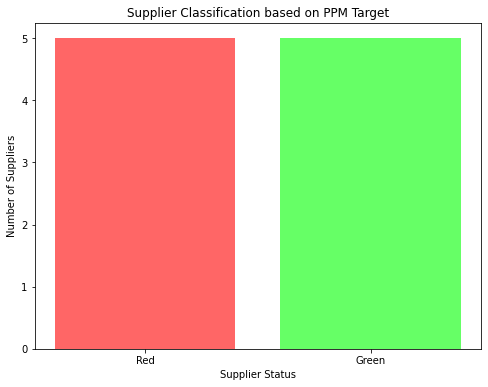

In [18]:
status_counts = supp_ppm['Supplier Status'].value_counts()
plt.figure(figsize=(8, 6))
bars = plt.bar(status_counts.index, status_counts.values, color=['#ff6666', '#66ff66'])
plt.title('Supplier Classification based on PPM Target')
plt.xlabel('Supplier Status')
plt.ylabel('Number of Suppliers')
plt.show()



In [259]:
import numpy as np
date_range = pd.date_range(start='2018-01-01', end='2023-12-31', freq='MS')
ppm_values = []
for date in date_range:
    if date.month in [3, 9]:
        ppm = np.random.uniform(500, 1000)  
    elif date.month in [11, 12]:
        ppm = np.random.uniform(80, 100)   
    else:
        ppm = np.random.uniform(200, 400)  
    ppm_values.append(ppm)
data = {
    'Date': date_range,
    'ppm': ppm_values
}
df = pd.DataFrame(data)

In [260]:
df

,Date,ppm
0,2018-01-01,274.908024
1,2018-02-01,390.142861
2,2018-03-01,865.996971
3,2018-04-01,319.731697
4,2018-05-01,231.203728
...,...,...
67,2023-08-01,360.439396
68,2023-09-01,537.275322
69,2023-10-01,397.377387
70,2023-11-01,95.444895


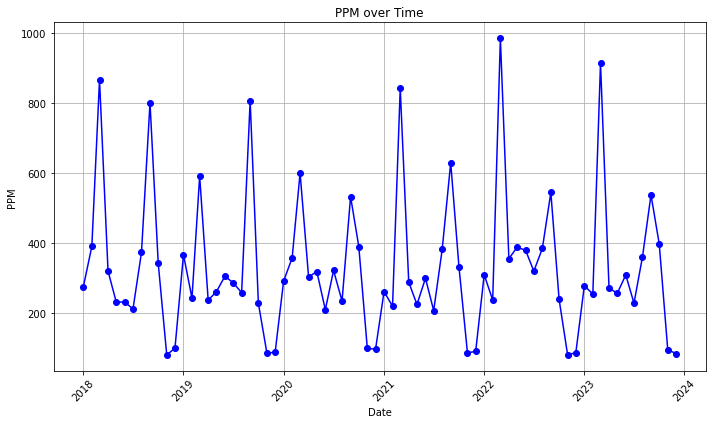

In [261]:
df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(10, 6))
plt.plot(df['Date'].values, df['ppm'].values, marker='o', linestyle='-', color='b')
plt.title('PPM over Time')
plt.xlabel('Date')
plt.ylabel('PPM')
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()

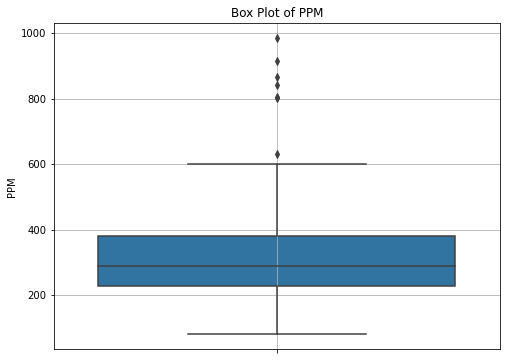

In [265]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(8, 6))
sns.boxplot(y='ppm', data=df)
plt.title('Box Plot of PPM')
plt.ylabel('PPM')
plt.grid(True)
plt.show()


In [266]:
Q1 = df['ppm'].quantile(0.25)
Q3 = df['ppm'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
mon_fore = df[(df['ppm'] >= lower_bound) & (df['ppm'] <= upper_bound)]
mon_fore

,Date,ppm,Year
0,2018-01-01,274.908024,2018
1,2018-02-01,390.142861,2018
3,2018-04-01,319.731697,2018
4,2018-05-01,231.203728,2018
5,2018-06-01,231.198904,2018
...,...,...,...
67,2023-08-01,360.439396,2023
68,2023-09-01,537.275322,2023
69,2023-10-01,397.377387,2023
70,2023-11-01,95.444895,2023


In [267]:
outliers = df[(df['ppm'] < lower_bound) | (df['ppm'] > upper_bound)]
outliers


,Date,ppm,Year
2,2018-03-01,865.996971,2018
8,2018-09-01,800.557506,2018
20,2019-09-01,805.926447,2019
38,2021-03-01,842.116513,2021
44,2021-09-01,629.389991,2021
50,2022-03-01,984.792314,2022
62,2023-03-01,914.368755,2023


C:\Users\preet\AppData\Local\Temp\ipykernel_3400\620061708.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mon_fore['Date'] = pd.to_datetime(mon_fore['Date'])


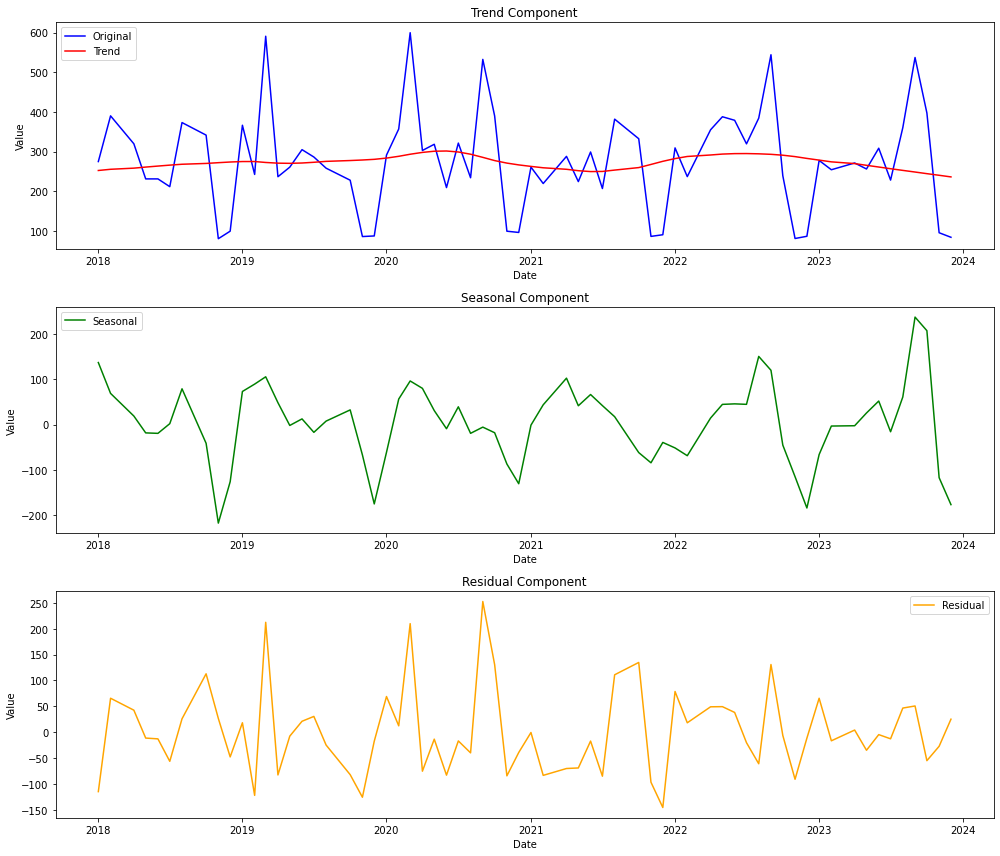

In [268]:
from statsmodels.tsa.seasonal import STL
mon_fore['Date'] = pd.to_datetime(mon_fore['Date'])
seasonal_period = 12  
decomposition = STL(mon_fore['ppm'], period=seasonal_period).fit()
trend = decomposition.trend.values
seasonal = decomposition.seasonal.values
residual = decomposition.resid.values
plt.figure(figsize=(14, 12))
plt.subplot(3, 1, 1)
plt.plot(mon_fore['Date'].values, mon_fore['ppm'].values, label='Original', color='blue')
plt.plot(mon_fore['Date'].values, trend, label='Trend', color='red')
plt.title('Trend Component')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(mon_fore['Date'].values, seasonal, label='Seasonal', color='green')
plt.title('Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()


plt.subplot(3, 1, 3)
plt.plot(mon_fore['Date'].values, residual, label='Residual', color='orange')
plt.title('Residual Component')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()


In [269]:
from scipy.stats import boxcox
mon_fore.loc[:, 'Date'] = pd.to_datetime(mon_fore['Date'])
mon_fore.loc[:, 'year'] = mon_fore['Date'].dt.year
mon_fore.loc[:, 'month'] = mon_fore['Date'].dt.month
mon_fore.loc[:, 'quarter'] = mon_fore['Date'].dt.quarter
mon_fore.loc[:, 'day_of_month'] = mon_fore['Date'].dt.day
mon_fore.loc[:, 'day_of_week'] = mon_fore['Date'].dt.dayofweek
mon_fore.loc[:, 'week_of_year'] = mon_fore['Date'].dt.isocalendar().week
mon_fore.loc[:, 'is_month_start'] = mon_fore['Date'].dt.is_month_start
mon_fore.loc[:, 'is_month_end'] = mon_fore['Date'].dt.is_month_end
mon_fore.loc[:, 'ppm_lag1'] = mon_fore['ppm'].shift(1)
mon_fore.loc[:, 'ppm_lag2'] = mon_fore['ppm'].shift(2)
mon_fore.loc[:, 'ppm_rolling_mean_3'] = mon_fore['ppm'].rolling(window=3).mean()
mon_fore.loc[:, 'ppm_rolling_std_3'] = mon_fore['ppm'].rolling(window=3).std()
mon_fore.loc[:, 'month_sin'] = np.sin(2 * np.pi * mon_fore['month'] / 12)
mon_fore.loc[:, 'month_cos'] = np.cos(2 * np.pi * mon_fore['month'] / 12)
mon_fore.loc[:, 'time_elapsed'] = (mon_fore['Date'] - mon_fore['Date'].min()).dt.days
mon_fore.loc[:, 'fourier_sin'] = np.sin(2 * np.pi * mon_fore['time_elapsed'] / 365)
mon_fore.loc[:, 'fourier_cos'] = np.cos(2 * np.pi * mon_fore['time_elapsed'] / 365)
mon_fore.fillna(0, inplace=True)
ppm_positive = mon_fore['ppm'] + 1e-6  
mon_fore['transformed_ppm'], lambda_bc = boxcox(ppm_positive)
mon_fore.head()


C:\Users\preet\AppData\Local\Temp\ipykernel_3400\1503937282.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mon_fore.loc[:, 'year'] = mon_fore['Date'].dt.year
C:\Users\preet\AppData\Local\Temp\ipykernel_3400\1503937282.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mon_fore.loc[:, 'month'] = mon_fore['Date'].dt.month
C:\Users\preet\AppData\Local\Temp\ipykernel_3400\1503937282.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

,Date,ppm,Year,year,month,quarter,day_of_month,day_of_week,week_of_year,is_month_start,...,ppm_lag1,ppm_lag2,ppm_rolling_mean_3,ppm_rolling_std_3,month_sin,month_cos,time_elapsed,fourier_sin,fourier_cos,transformed_ppm
0,2018-01-01,274.908024,2018,2018,1,1,1,0,1,True,...,0.000000,0.000000,0.000000,0.000000,5.000000e-01,0.866025,0,0.000000,1.000000,65.081000
1,2018-02-01,390.142861,2018,2018,2,1,1,3,5,True,...,274.908024,0.000000,0.000000,0.000000,8.660254e-01,0.500000,31,0.508671,0.860961,82.920813
3,2018-04-01,319.731697,2018,2018,4,2,1,6,13,True,...,390.142861,274.908024,328.260861,58.088957,8.660254e-01,-0.500000,90,0.999769,0.021516,72.262044
4,2018-05-01,231.203728,2018,2018,5,2,1,1,18,True,...,319.731697,390.142861,313.692762,79.641469,5.000000e-01,-0.866025,120,0.880012,-0.474951,57.705752
5,2018-06-01,231.198904,2018,2018,6,2,1,4,22,True,...,231.203728,319.731697,260.711443,51.113039,1.224647e-16,-1.000000,151,0.516062,-0.856551,57.704915


In [218]:
import statsmodels.api as sm
endog = mon_fore['transformed_ppm']
exog = mon_fore[['ppm_rolling_std_3', 'month_cos', 'ppm_rolling_mean_3', 'fourier_cos', 'fourier_sin']]
model = sm.tsa.SARIMAX(endog, exog=exog, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_results = model.fit()
print(sarimax_results.summary())

C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                     SARIMAX Results                                      
Dep. Variable:                    transformed_ppm   No. Observations:                   61
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -266.981
Date:                            Sun, 15 Sep 2024   AIC                            553.962
Time:                                    10:13:53   BIC                            572.674
Sample:                                         0   HQIC                           561.034
                                             - 61                                         
Covariance Type:                              opg                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
ppm_rolling_std_3     -0.9526      0.284     -3.352      0.001      -1.510      -0.396
month_cos  

C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\preet\AppData\Local\Temp\ipykernel_3400\3149798888.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mon_fore['Date'] = pd.to_datetime(mon_fore['Date'])
C:\Users\preet\AppData\Local\Temp\ipykernel_3400\3149798888.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mon_fore['transformed_ppm'], lambda_bc = boxcox(ppm_positive)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency informati

Train MSE: 2983.414644959505
Test MSE: 3276.145299356305
Train R^2: 0.44708661916044645
Test R^2: 0.668477567115052
y_train.index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
y_train_original shape: (48,)
test_pred_inv shape: (12,)


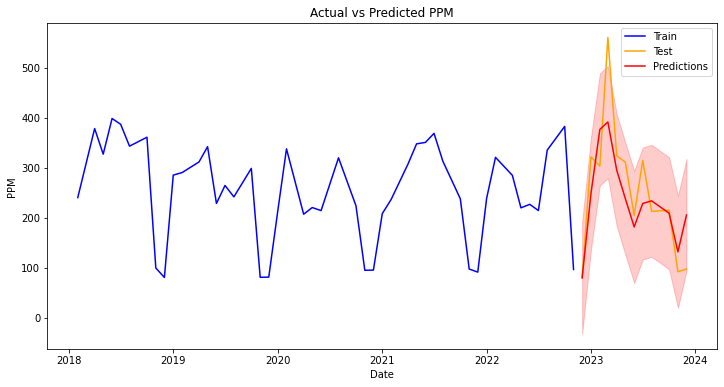

C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


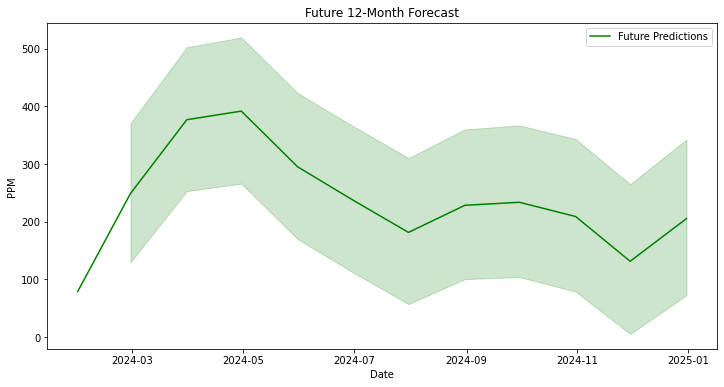

In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from scipy.special import inv_boxcox
from scipy.stats import boxcox
np.random.seed(42)
mon_fore['Date'] = pd.to_datetime(mon_fore['Date'])
mon_fore.set_index('Date', inplace=True)
ppm_positive = mon_fore['ppm'] + 1e-6  
mon_fore['transformed_ppm'], lambda_bc = boxcox(ppm_positive)
X = mon_fore[["ppm_rolling_mean_3","ppm_rolling_std_3","ppm_lag1"]]
y = mon_fore['transformed_ppm']
def check_stationarity(series):
    result = adfuller(series)
    return result[1] 
X_diff = X.diff().dropna()
X_diff.columns = [col + '_diff' for col in X.columns]
y_aligned = y[X_diff.index]
X = X_diff
X_train, X_test, y_train, y_test = train_test_split(X, y_aligned, test_size=0.2, shuffle=False)
y_train.index = X_train.index
y_test.index = X_test.index
model = SARIMAX(y_train, exog=X_train, order=(1, 0, 1), seasonal_order=(1, 0, 1, 12))
sarimax_model = model.fit()

train_pred = sarimax_model.predict(start=0, end=len(y_train)-1, exog=X_train)
test_pred = sarimax_model.predict(start=len(y_train), end=len(y_aligned)-1, exog=X_test)

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R^2: {train_r2}")
print(f"Test R^2: {test_r2}")

y_train_original = inv_boxcox(y_train, lambda_bc)
y_test_original = inv_boxcox(y_test, lambda_bc)
train_pred_inv = inv_boxcox(train_pred, lambda_bc)
test_pred_inv = inv_boxcox(test_pred, lambda_bc)

ci_multiplier = 1.96  
test_ci_upper = test_pred_inv + ci_multiplier * np.sqrt(test_mse)
test_ci_lower = test_pred_inv - ci_multiplier * np.sqrt(test_mse)


print(f"y_train.index type: {type(y_train.index)}")
print(f"y_train_original shape: {y_train_original.shape}")
print(f"test_pred_inv shape: {test_pred_inv.shape}")


y_train_index = y_train.index.to_numpy()
y_train_original = y_train_original.to_numpy()
y_test_index = y_test.index.to_numpy()
y_test_original = y_test_original.to_numpy()
test_pred_inv = test_pred_inv.to_numpy()
test_ci_upper = test_ci_upper.to_numpy()
test_ci_lower = test_ci_lower.to_numpy()


plt.figure(figsize=(12, 6))
plt.plot(y_train_index, y_train_original, label='Train', color='blue')
plt.plot(y_test_index, y_test_original, label='Test', color='orange')
plt.plot(y_test_index, test_pred_inv, label='Predictions', color='red')
plt.fill_between(y_test_index, test_ci_lower, test_ci_upper, color='red', alpha=0.2)
plt.legend()
plt.title('Actual vs Predicted PPM')
plt.xlabel('Date')
plt.ylabel('PPM')
plt.show()


forecast_steps = 12
future_pred = sarimax_model.get_forecast(steps=forecast_steps, exog=X_test[-forecast_steps:])


forecast_mean = future_pred.predicted_mean
forecast_ci = future_pred.conf_int()


last_date = y_test.index[-1]
future_dates = pd.date_range(last_date, periods=forecast_steps + 1, freq='M')[1:]


future_pred_inv = inv_boxcox(forecast_mean, lambda_bc)
future_ci_upper = inv_boxcox(forecast_ci.iloc[:, 1], lambda_bc)
future_ci_lower = inv_boxcox(forecast_ci.iloc[:, 0], lambda_bc)

future_dates = future_dates.to_numpy()
future_pred_inv = future_pred_inv.to_numpy()
future_ci_upper = future_ci_upper.to_numpy()
future_ci_lower = future_ci_lower.to_numpy()

plt.figure(figsize=(12, 6))
plt.plot(future_dates, future_pred_inv, label='Future Predictions', color='green')
plt.fill_between(future_dates, future_ci_lower, future_ci_upper, color='green', alpha=0.2)
plt.legend()
plt.title('Future 12-Month Forecast')
plt.xlabel('Date')
plt.ylabel('PPM')
plt.show()
